# **Text Analysis**

- This file is mainly doing text analysis on the 'text' column

## **1. Import Data/Libraries**

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import numpy as np
import pandas as pd
import spacy
import nltk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import pandas as pd
import numpy as np # linear algebra
import bz2
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

In [ ]:
# load the Spacy language model
nlp = spacy.load("en_core_web_lg")

In [ ]:
# Import saved dataframe

file =  r'CIS509_workingfile.json'
df = pd.read_json(file, lines= True)

In [ ]:
df.tail(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month
42419,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,qGCpFKH6xj-V2-D1Or8sXg,Rrd2685h4FRUalA_mtOXEw,5,0,0,0,There lunch special is the best! The crust is...,2018-11-30 22:15:01,2018,11
42420,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,VKNMZ5ITllRZ7e1lBi4EOQ,qW-Q3krGy2FgY1ouN0znjQ,5,1,0,0,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16,2018,10
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,TaUkKNCcK_yVNst35g7fLw,avcQbkVRQ0skWZS1rkoAQg,4,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7


In [ ]:
df.shape

(42422, 24)

In [ ]:
df.dtypes

business_id             object
name                    object
address                 object
city                    object
state                   object
postal_code              int64
latitude               float64
longitude              float64
stars_x                float64
review_count             int64
is_open                  int64
attributes              object
categories              object
hours                   object
review_id               object
user_id                 object
stars_y                  int64
useful                   int64
funny                    int64
cool                     int64
text                    object
date            datetime64[ns]
year                     int64
month                    int64
dtype: object

## **2. Text Analysis**

- Taking Stars as Sentiment to test

In [ ]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus (sample size)
unique_user = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique users
date_list = [] # able to measure the number of comments by day, week, etc.
vote_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

In [ ]:
for index, row in df.iterrows():
    text = row["text"]
    doc = nlp(text)
    num_of_comments += 1

    # statistics regarding words
    num_of_tokens = len(doc)
    total_number_of_tokens += num_of_tokens
    token_count_without_stop_words = 0

    for token in doc:
        if token.is_stop is True:
            pass
        else:
            unique_word.add(str(token).lower())
            token_count_without_stop_words += 1

    num_of_token_per_comment.append(num_of_tokens)
    num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)


    # statistics regarding business
    business_id = row["business_id"]
    unique_user.add(business_id)

    # # statistics regarding date
    # date = row["date"]
    # date_list.append(date)

    # statistics regarding reviews
    review_id = row["review_id"]
    unique_submission.add(review_id)

In [ ]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique business:", len(unique_user))
print("number of sumbissions:", len(unique_submission))

number of comments: 42422
number of unique words: 38444
total number of words in the corpus: 4238631
average number of words in comments: 99.91586912451086
average number of words in comments without stop words: 51.943119136297206
maximum number of words in comments: 1110
maximum number of words in comments without stop words: 745
minimum number of words in comments: 2
minimum number of words in comments without stop words: 2
median number of words in comments: 71.0
median number of words in comments without stop words: 38.0
number of unique business: 944
number of sumbissions: 42422


- **stars_x: business dataset stars** (number of stars of a particular business)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


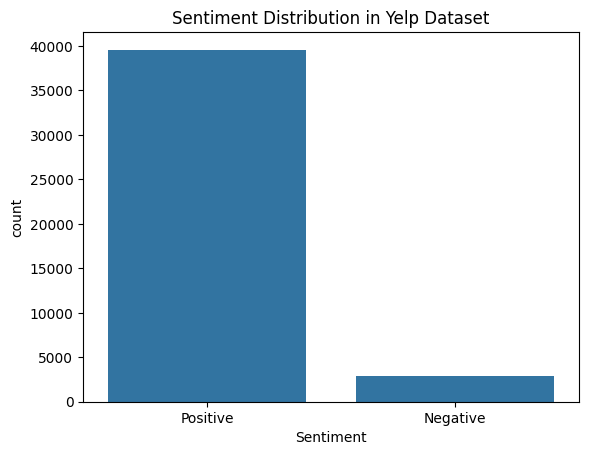

Duplicate Reviews: 56


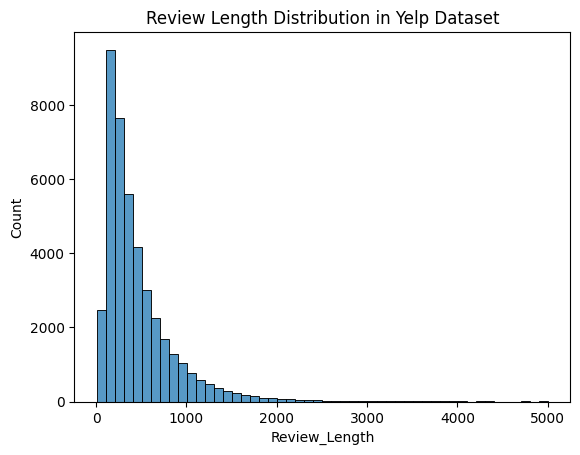

<ipython-input-11-9b57a43f79ac>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  corpus = corpus.str.lower().str.replace('[^\w\s]', '')


Top 10 Words in Yelp Reviews:
 [('food', 26560), ('good', 20252), ('great', 19361), ('place', 18401), ('service', 15097), ('back', 10835), ('time', 10437), ('one', 10129), ('like', 10126), ('delicious', 9955)]


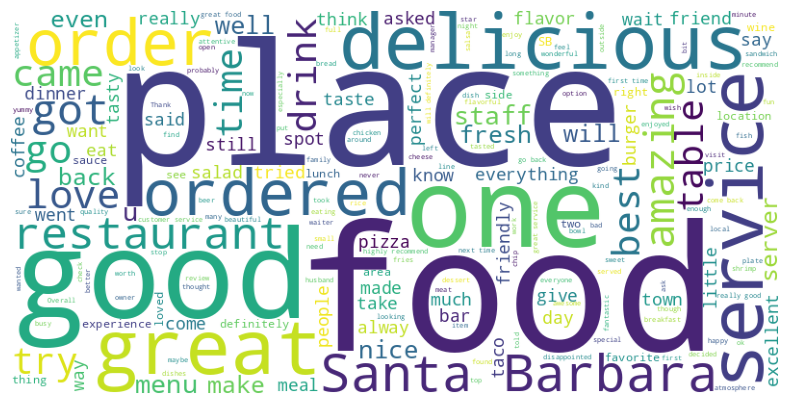

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define functions for analysis
def get_top_n_words(corpus, n=None):
    stop_words = set(stopwords.words('english'))
    corpus = corpus.str.lower().str.replace('[^\w\s]', '')
    words = corpus.str.split().apply(lambda x: [item for item in x if item not in stop_words])
    words = [word for sublist in words for word in sublist]
    counter = Counter(words)
    return counter.most_common(n)

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Convert stars to sentiment
df['Sentiment'] = df['stars_x'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Sentiment Distribution Analysis
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution in Yelp Dataset')
plt.show()

# # Missing Values Analysis
# print("Missing Values:\n", df.isnull().sum())

# Duplicate Reviews Analysis
print("Duplicate Reviews:", df.duplicated(subset=['text']).sum())

# Text Length Analysis
df['Review_Length'] = df['text'].apply(len)
sns.histplot(df['Review_Length'], bins=50)
plt.title('Review Length Distribution in Yelp Dataset')
plt.show()

# Top Words Analysis
top_words = get_top_n_words(df['text'], 10)
print("Top 10 Words in Yelp Reviews:\n", top_words)

# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['text'])
generate_wordcloud(positive_reviews)

- **star_y** : review dataset stars** (ratings/stars given by customers themself about the business)

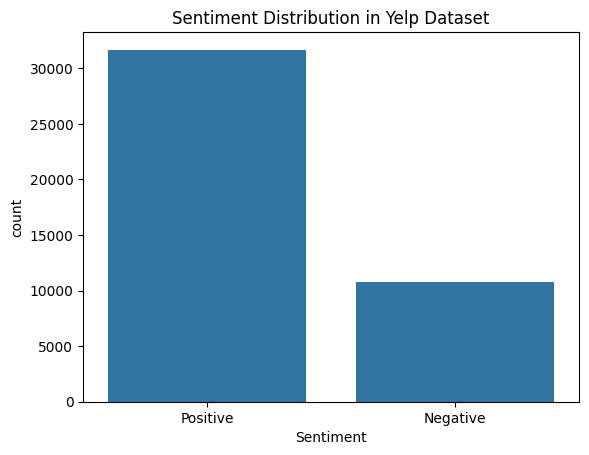

Duplicate Reviews: 56


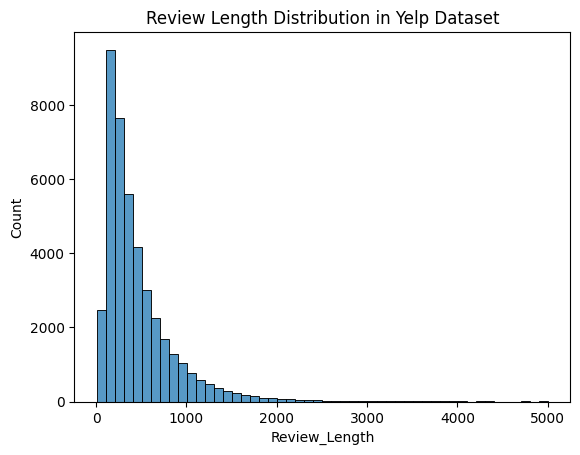

<ipython-input-12-a6ce2e1ccbf7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  corpus = corpus.str.lower().str.replace('[^\w\s]', '')


Top 10 Words in Yelp Reviews:
 [('food', 26560), ('good', 20252), ('great', 19361), ('place', 18401), ('service', 15097), ('back', 10835), ('time', 10437), ('one', 10129), ('like', 10126), ('delicious', 9955)]


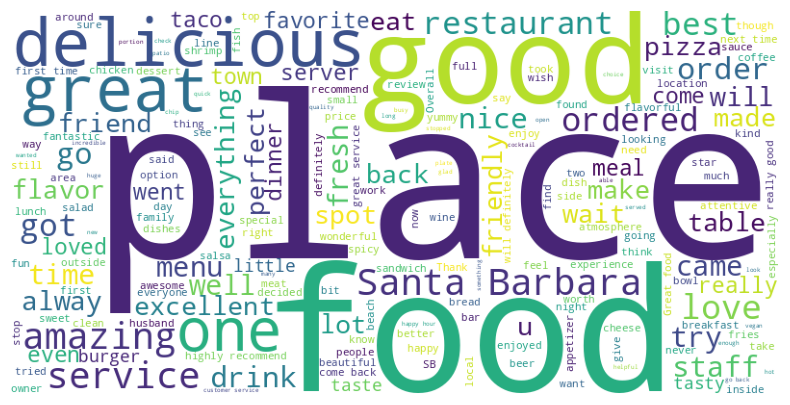

In [ ]:
# Define functions for analysis
def get_top_n_words(corpus, n=None):
    stop_words = set(stopwords.words('english'))
    corpus = corpus.str.lower().str.replace('[^\w\s]', '')
    words = corpus.str.split().apply(lambda x: [item for item in x if item not in stop_words])
    words = [word for sublist in words for word in sublist]
    counter = Counter(words)
    return counter.most_common(n)

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Convert stars to sentiment
df['Sentiment'] = df['stars_y'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Sentiment Distribution Analysis
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution in Yelp Dataset')
plt.show()

# # Missing Values Analysis
# print("Missing Values:\n", df.isnull().sum())

# Duplicate Reviews Analysis
print("Duplicate Reviews:", df.duplicated(subset=['text']).sum())

# Text Length Analysis
df['Review_Length'] = df['text'].apply(len)
sns.histplot(df['Review_Length'], bins=50)
plt.title('Review Length Distribution in Yelp Dataset')
plt.show()

# Top Words Analysis
top_words = get_top_n_words(df['text'], 10)
print("Top 10 Words in Yelp Reviews:\n", top_words)

# Word Cloud for Positive and Negative Reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['text'])
generate_wordcloud(positive_reviews)